<a href="https://www.kaggle.com/code/mustafacihadgoktepe/body-fat-percentage?scriptVersionId=140651108" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Welcome to this machine learning regression project, where we aim to predict body fat percentage based on various physical measurements. Body fat percentage is a crucial health indicator and is used in a wide range of applications, from fitness and healthcare assessments to medical research.

In this notebook, we will walk through the entire data science pipeline, starting with data exploration and preprocessing, including handling missing values, outliers, and feature selection. We'll then move on to model selection, training, and evaluation, comparing the performance of multiple regression algorithms.

The key steps in this project include:
- Data Loading and Exploration: We'll start by loading our dataset and gaining insights into its structure, including examining the relationships between features and our target variable, body fat percentage.

- Data Preprocessing: This step involves cleaning the data, handling outliers, removing or imputing missing values, and standardizing features to ensure our models perform optimally.

- Feature Selection: We'll use techniques like mutual information, correlation analysis, and visualizations to select the most relevant features for our predictive model.

- Model Building: We will experiment with various regression algorithms, including Linear Regression, Random Forest, Stochastic Gradient Descent, Gradient Boosting, XGBoost, and LightGBM, to find the best model for predicting body fat percentage.

- Model Evaluation: Our model's performance will be evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) on both validation and cross-validated data.

By the end of this notebook, you'll have a well-documented machine learning pipeline that can predict body fat percentage accurately, with insights into which features are most influential in making these predictions.

So, let's get started on this exciting journey of predicting body fat percentage using machine learning!


# Data Exploration and Preprocessing

In this section, we'll start by exploring the dataset and preparing it for our machine learning modeling. The goal is to predict body fat percentage based on various physical measurements.

## Data Loading and Initial Examination

We begin by importing the necessary libraries and loading our dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/body-fat-prediction-dataset/bodyfat.csv')
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


Definitions of the column names:

* BodyFat: Percent body fat from Siri's (1956) equation
* Age: (years)
* Weight: (lbs)
* Height: (inches)
* Neck circumference: (cm)
* Chest circumference: (cm)
* Abdomen circumference: (cm)
* Hip circumference: (cm)
* Thigh circumference: (cm)
* Knee circumference: (cm)
* Ankle circumference: (cm)
* Biceps (extended) circumference: (cm)
* Forearm circumference: (cm)
* Wrist circumference: (cm)

Our dataset contains several columns, including 'BodyFat,' 'Age,' 'Weight,' 'Height,' and several circumference measurements. We'll be using these features to predict body fat percentage.

## Data Description

Before diving deeper into the data, let's take a brief look at its structure:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BodyFat,252.0,19.150794,8.368740,0.0,12.475,19.20,25.300,47.50
Age,252.0,44.884921,12.602040,22.0,35.750,43.00,54.000,81.00
Weight,252.0,178.924405,29.389160,118.5,159.000,176.50,197.000,363.15
Height,252.0,70.148810,3.662856,29.5,68.250,70.00,72.250,77.75
Neck,252.0,37.992063,2.430913,31.1,36.400,38.00,39.425,51.20
Chest,252.0,100.824206,8.430476,79.3,94.350,99.65,105.375,136.20
Abdomen,252.0,92.555952,10.783077,69.4,84.575,90.95,99.325,148.10
Hip,252.0,99.904762,7.164058,85.0,95.500,99.30,103.525,147.70
Thigh,252.0,59.405952,5.249952,47.2,56.000,59.00,62.350,87.30
Knee,252.0,38.590476,2.411805,33.0,36.975,38.50,39.925,49.10


Because percentage of body fat calculated by directly density: Percentage of Body Fat (i.e. 100*B) = 495/Density - 450.

I will drop 'Density' column.

In [2]:
data.drop('Density', axis=1, inplace=True)

## Data Cleaning

### Handling Unlikely Body Fat Percentages

We notice that some body fat percentages are unrealistically low (below 5%). To maintain data integrity and model accuracy, we've decided to remove these outliers:

In [5]:
data.loc[data['BodyFat']<=5]

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
8,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
25,3.7,27,159.25,71.50,35.7,89.6,79.7,96.5,55.0,36.7,22.5,29.9,28.2,17.7
28,3.7,27,133.25,64.75,36.4,93.5,73.9,88.5,50.1,34.5,21.3,30.5,27.9,17.2
49,4.0,47,127.50,66.75,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8
54,3.9,42,136.25,67.50,37.8,87.6,77.6,88.6,51.9,34.9,22.5,27.7,27.5,18.5
170,3.0,35,152.25,67.75,37.0,92.2,81.9,92.8,54.7,36.2,22.1,30.4,27.4,17.7
171,0.7,35,125.75,65.50,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9
181,0.0,40,118.50,68.00,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


In [6]:
data.drop(data.loc[data['BodyFat']<=5].index, inplace=True)

In [7]:
data.shape

(244, 14)

This step helps ensure that our dataset contains only valid and plausible values.

### Handling Unusual Height

Additionally, we've identified a row with an unusually low height of 29.5 inches. Since this value appears to be an outlier or data entry error, we've chosen to exclude it:

In [8]:
data.loc[data['Height']==29.5]

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
41,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


In [9]:
data.drop(data.loc[data['Height']==29.5].index, inplace=True)

In [10]:
data.shape

(243, 14)

By addressing these anomalies, we enhance the reliability of our dataset for subsequent analysis and modeling.

### Duplicates

Lastly, we've checked for duplicate rows within the dataset:

In [11]:
data.duplicated().sum()

0

# Feature Selection and Correlation Analysis

In this section, we delve into feature selection and examine the correlations between our features and the target variable, body fat percentage.

In [12]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(data[data.columns.drop('BodyFat')],
                                         data[['BodyFat']]),
                  columns=['MI Scores'],
                  index=data.columns.drop('BodyFat'))
corr = pd.DataFrame(data[data.columns.drop('BodyFat')].corrwith(data['BodyFat']),
                    columns=['Correlation'])
s_corr = pd.DataFrame(data[data.columns.drop('BodyFat')].corrwith(data['BodyFat'],
                                                                  method='spearman'),
                      columns=['Spearman_Correlation'])


relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
Abdomen,0.550652,0.797410,0.799409
Chest,0.319550,0.684971,0.653806
Hip,0.288679,0.595323,0.584389
Weight,0.264665,0.587088,0.590255
Thigh,0.258640,0.522959,0.514791
Knee,0.185742,0.462260,0.448000
Biceps,0.168991,0.471118,0.474158
Neck,0.115176,0.478344,0.480321
Age,0.082475,0.263868,0.244940
Wrist,0.061209,0.324746,0.294040


# Interpreting Feature Selection and Correlation Analysis Results

In this section, we'll interpret the results of our feature selection and correlation analysis, shedding light on the significance of various features in predicting body fat percentage.

## Mutual Information (MI) Scores

The Mutual Information (MI) scores provide us with a measure of how informative each feature is in predicting body fat percentage. Here's what we can infer from the MI scores:

- **Abdomen** has the highest MI score (0.550652), indicating that it contains essential information for predicting body fat percentage. A larger abdomen circumference may correspond to higher body fat percentages.

- **Chest** follows with a substantial MI score (0.319550), suggesting that chest circumference also plays a significant role in predicting body fat percentage.

- **Hip** and **Weight** also have noteworthy MI scores (0.288679 and 0.264665, respectively). This implies that hip circumference and weight are relevant factors in determining body fat percentage.

- Other features, such as **Thigh**, **Knee**, **Biceps**, and **Neck**, also exhibit moderate MI scores, suggesting their importance in our predictive model.

- **Height** shows the lowest MI score (0.017131), indicating that it contributes the least information to predict body fat percentage.

## Correlation Analysis

The correlation analysis explores linear (Pearson's) and rank (Spearman's) correlations between features and body fat percentage. Here's what we can conclude from the correlation scores:

- **Abdomen** demonstrates the strongest correlation with body fat percentage. Both Pearson's (0.797410) and Spearman's (0.799409) correlations confirm a positive and robust relationship. This suggests that individuals with larger abdomen circumferences tend to have higher body fat percentages.

- **Chest** also exhibits a significant positive correlation, with Pearson's correlation at 0.684971 and Spearman's at 0.653806. A larger chest circumference is associated with higher body fat percentages.

- **Hip** and **Weight** both show positive correlations, further supporting their relevance in predicting body fat percentage.

- **Height**, on the other hand, has a negligible linear (Pearson's) correlation (-0.084742) and a weak rank (Spearman's) correlation (-0.043213) with body fat percentage. This implies that height has little impact on predicting body fat percentage.

## Feature Importance and Model Building

The combination of MI scores and correlation analysis provides us with valuable insights into the importance of features for predicting body fat percentage. Features like **Abdomen**, **Chest**, **Hip**, and **Weight** stand out as strong predictors. Conversely, **Height** appears to be a relatively weak predictor.

These insights will guide our feature selection process and inform the development of more accurate predictive models. Features with high MI scores and strong correlations will likely play a crucial role in our final model, ensuring its effectiveness in predicting body fat percentage accurately.


# Data Visualization and Exploration

In this section, we'll explore the dataset visually to gain a deeper understanding of its distribution and relationships between variables.

## Correlation Heatmap

We start by creating a correlation heatmap to visualize the relationships between numerical variables and body fat percentage:

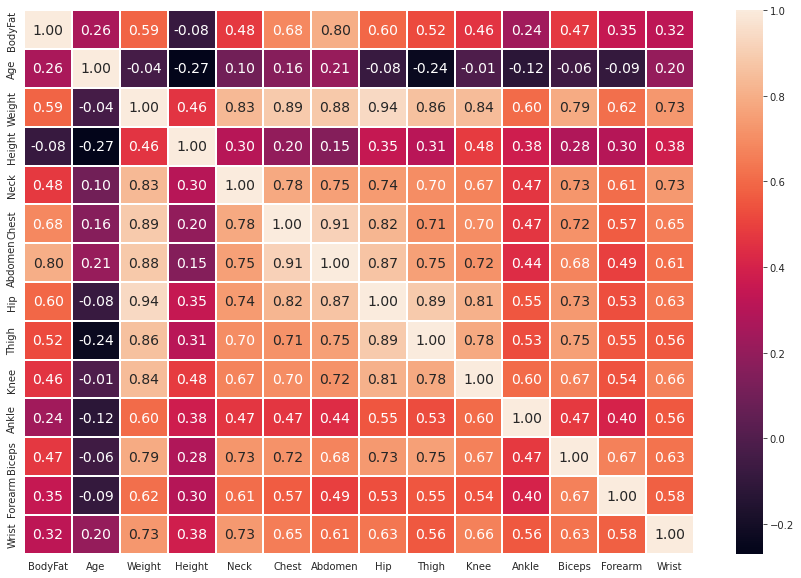

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.1, annot_kws={"fontsize":14}, fmt='.2f');

This heatmap provides a quick overview of the strength and direction of correlations. Features with brighter colors represent stronger relationships, while darker colors indicate weaker or negative correlations.

## Distribution and Box Plots

Next, we examine the distribution of each feature and identify potential outliers. We use both distribution plots and box plots for this purpose:

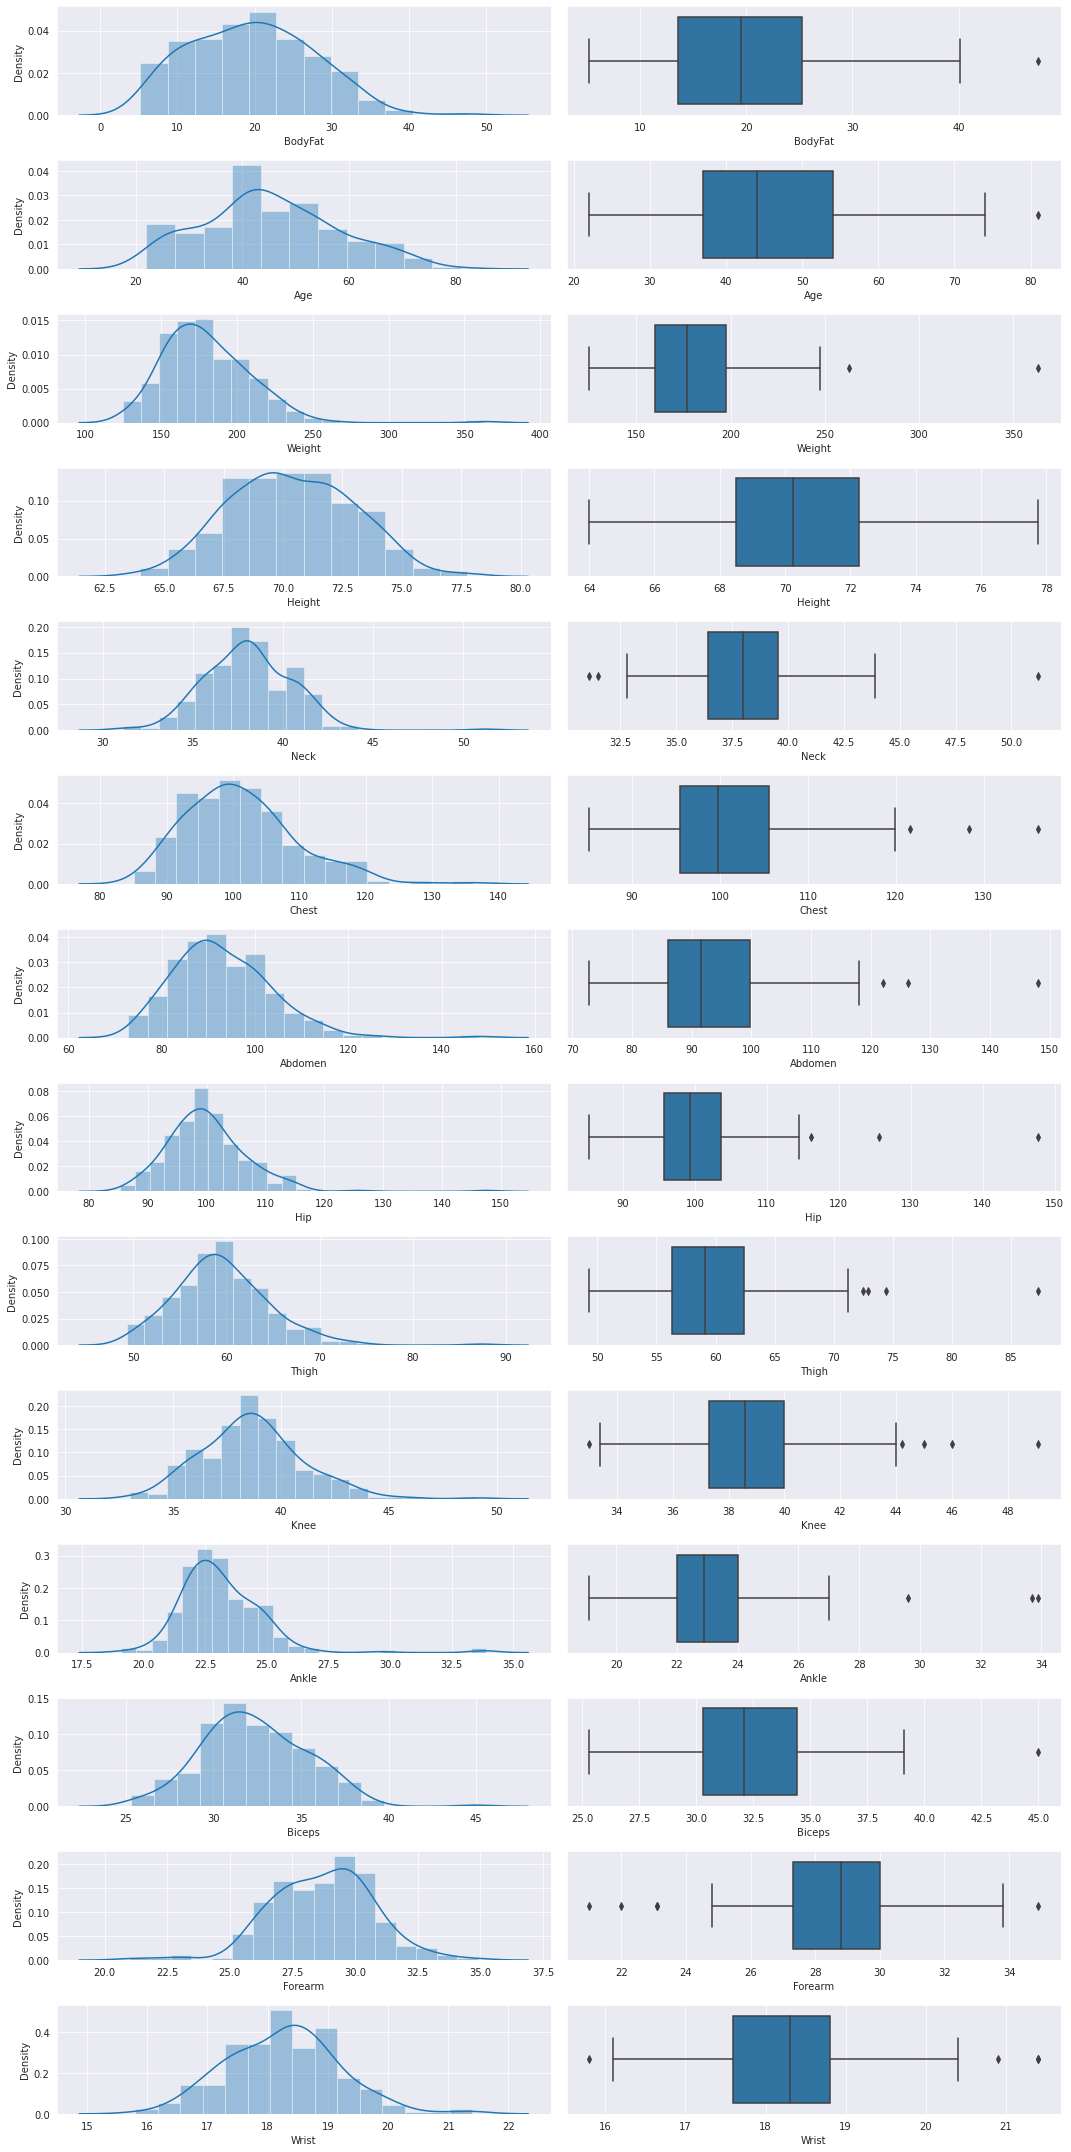

In [14]:
fig,ax = plt.subplots(14,2,figsize=(15,30))

for i, column in enumerate(data.columns):
    sns.distplot(data[column], ax=ax[i, 0])
    sns.boxplot(data[column], ax=ax[i, 1])

fig.tight_layout()

These plots allow us to visualize the spread of data, central tendencies, and the presence of outliers in each feature.

## Regression Plots

To further understand the relationships between individual features and body fat percentage, we create regression plots:

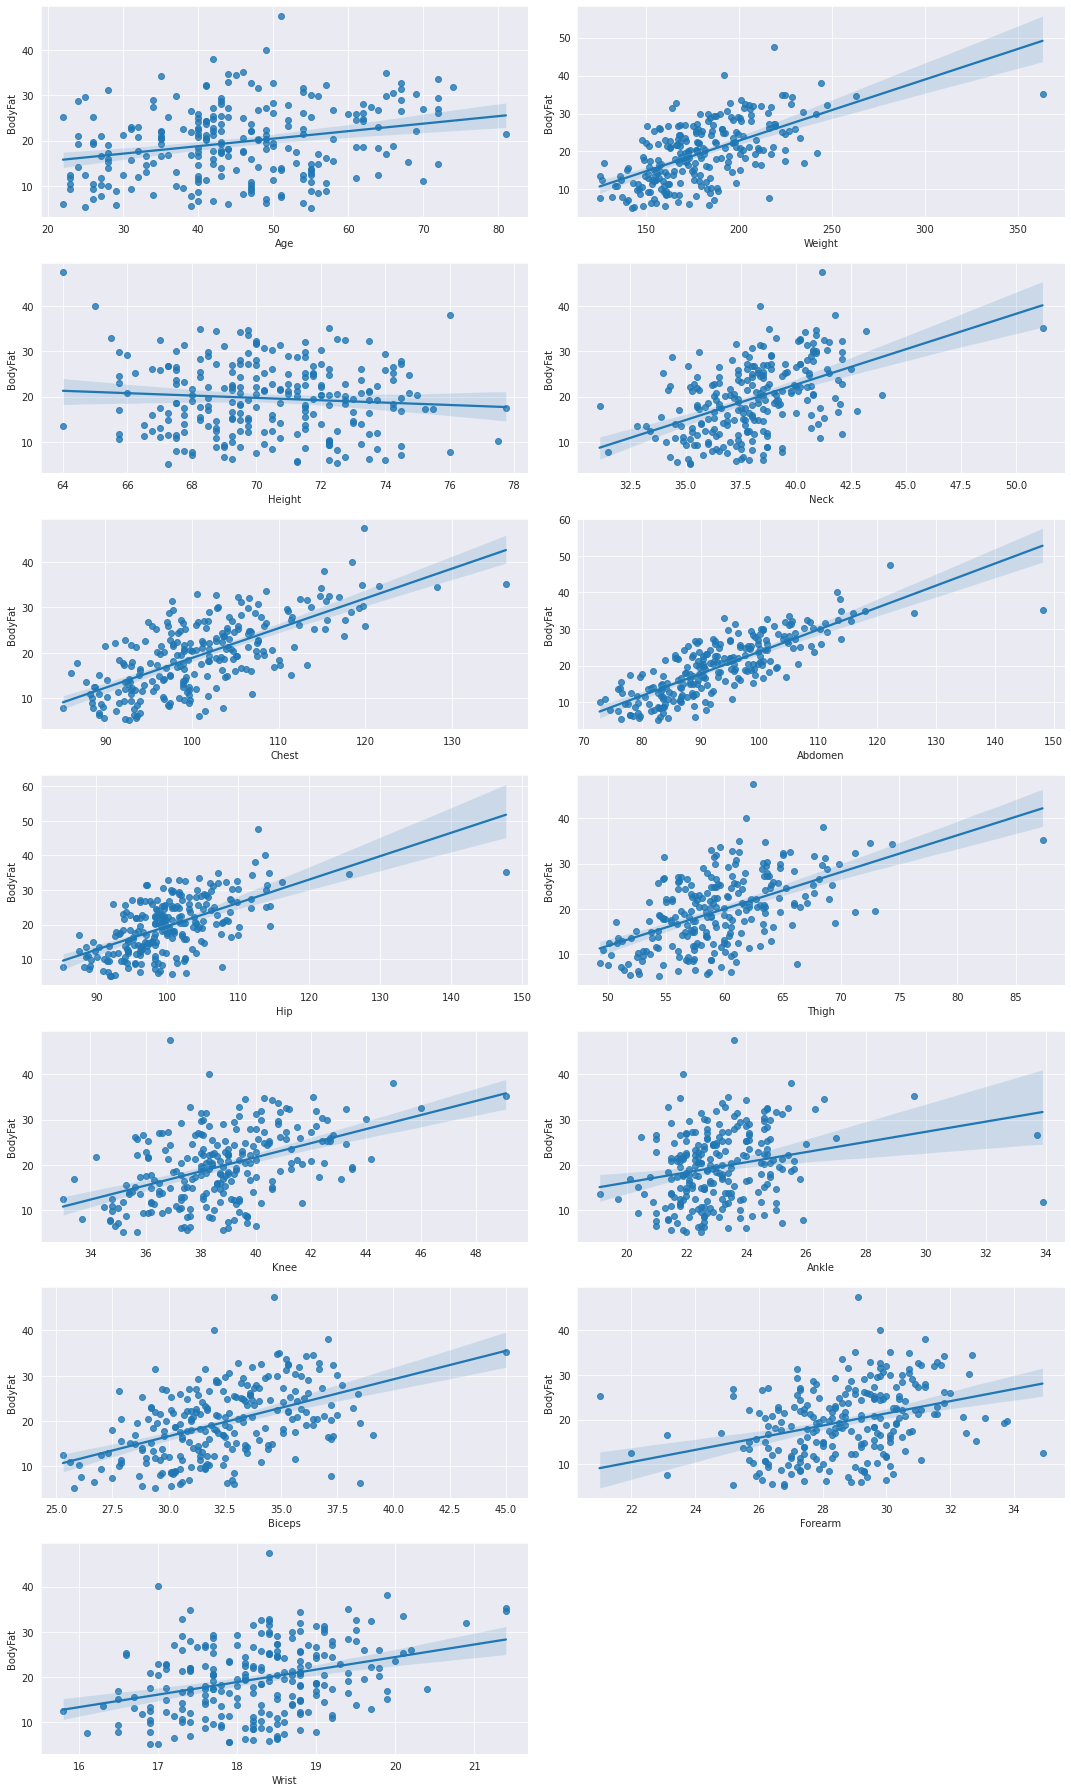

In [15]:
plt.figure(figsize=(15,25))

for i, column in enumerate(data.columns.drop('BodyFat')):
    plt.subplot(7, 2, i + 1)
    sns.regplot(data=data, x=column, y='BodyFat')
    
plt.tight_layout();

# Data Preprocessing: Removing Height Column and Outliers

In this section, we perform essential data preprocessing steps to enhance the quality of our dataset for modeling.

## Dropping the 'Height' Column

To streamline our dataset and improve model efficiency, we decide to drop the 'Height' column, as it showed relatively weak correlations with body fat percentage and may not significantly contribute to our predictions.

In [16]:
data.drop('Height', axis=1, inplace=True)

## Outlier Removal

Outliers can have a significant impact on model performance. To mitigate this, we employ an outlier removal technique. We define outliers using the Interquartile Range (IQR) method and cap extreme values.

In [17]:
def remove_outlier(data, column_list):
    for col_name in column_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3 - q1
        low = q1 - iqr*1.5
        up = q3 + iqr*1.5
        data.loc[data[col_name] < low, col_name] = low
        data.loc[data[col_name] > up, col_name] = up
    
remove_outlier(data, data[data.columns.drop('BodyFat')])

This process helps ensure that extreme values that could potentially skew our predictions are brought within a reasonable range.

## Visualizing Outliers

To visually assess the success of our outlier removal, we generate box plots for each feature:

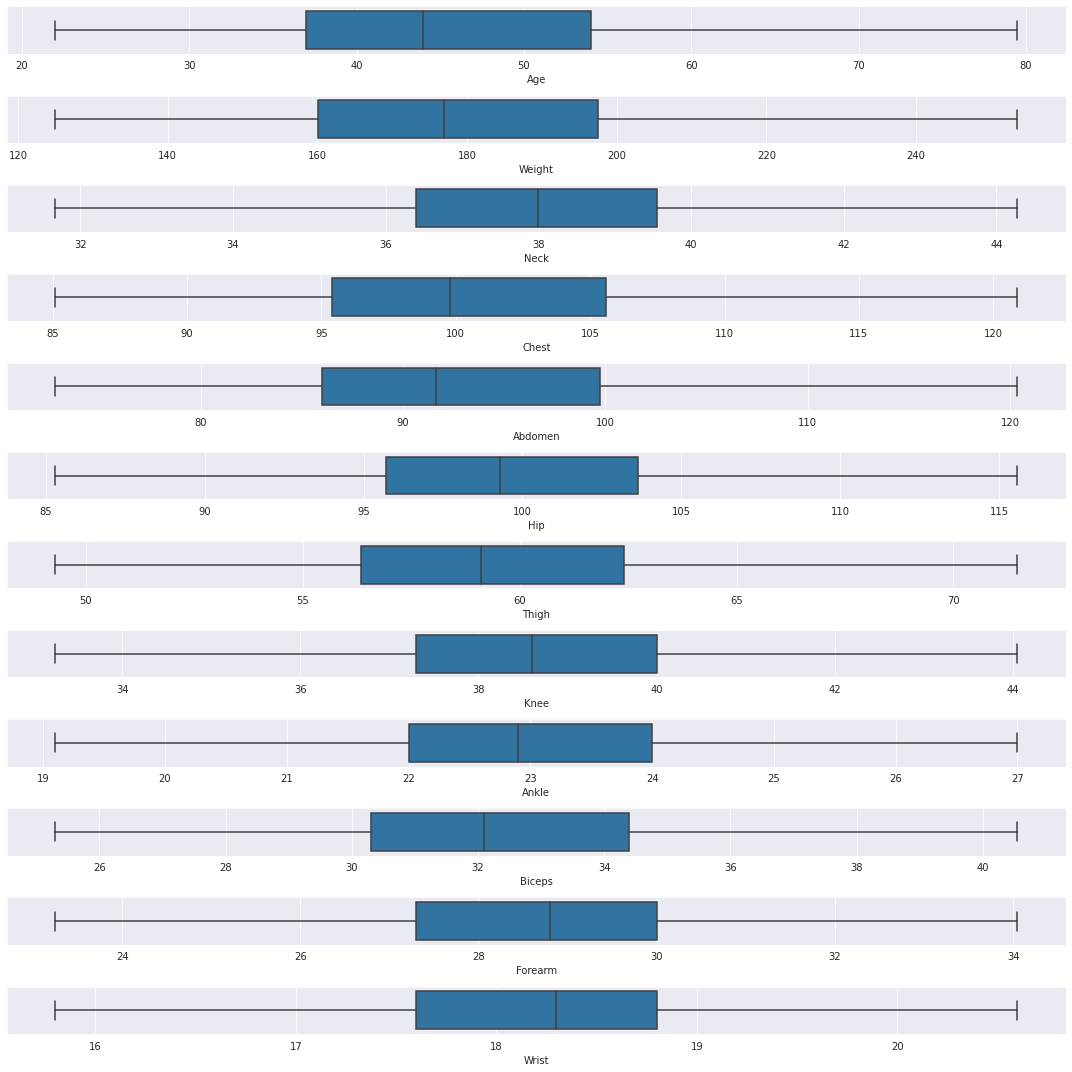

In [19]:
plt.figure(figsize=(15,15), tight_layout=True)

for i, column in enumerate(data[data.columns.drop('BodyFat')]):
    plt.subplot(12,1,i+1)
    sns.boxplot(data[column]);

These box plots provide a visual representation of the data distribution, highlighting the presence of outliers. After our outlier removal, we can observe a reduction in extreme values.

With the 'Height' column dropped and outliers addressed, our dataset is now better prepared for building and training predictive models.

# Data Splitting and Feature Scaling

In this section, we prepare our data for model training by splitting it into training and validation sets and applying feature scaling.

## Data Splitting

We begin by dividing our dataset into features (X) and the target variable (y). The target variable, 'BodyFat,' represents the percentage of body fat we want to predict. The features include various physical characteristics.

In [20]:
from sklearn.model_selection import train_test_split

X = data.drop('BodyFat', axis=1)
y = data[['BodyFat']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8)

## Feature Scaling

Scaling is a crucial preprocessing step for many machine learning algorithms, especially those involving gradient descent. It ensures that all features have the same scale, preventing some features from dominating others during model training.

We use the StandardScaler from Scikit-Learn to standardize our features. Standardization scales each feature to have a mean of 0 and a standard deviation of 1.

In [21]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

X_scaled = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
X_train = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(standard_scaler.transform(X_valid), columns=X_valid.columns)

By applying feature scaling to both the full dataset (`X_scaled`) and the training and validation subsets (`X_train` and `X_valid`), we ensure that our model can effectively learn from the data without being biased by variations in feature scales.

With our data split and features scaled, we're ready to move on to building and training predictive models for body fat percentage.

# Model Training and Evaluation

In this section, we explore the application of several regression algorithms to predict body fat percentage. We evaluate each model's performance using common regression metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

## Regression Models

We employ a variety of regression models to determine which one yields the most accurate predictions for body fat percentage:

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
rfr = RandomForestRegressor()
sgdr = SGDRegressor(eta0=0.001)
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()
lgbmr = LGBMRegressor()

models = [lr, rfr, sgdr, gbr, xgbr, lgbmr]
model_name = ['Linear Regression', 'Random Forest', 'Stochastic Gradient Descent',
              'Gradient Boosting', 'XGBoost', 'LGBM']

mae_scores = []
mse_scores = []
rmse_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)
    mae_scores.append(mae)
    mse = mean_squared_error(y_valid, y_pred)
    mse_scores.append(mse)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

## Model Evaluation and Performance

For each model, we train it on the training dataset and then make predictions on the validation dataset. We assess the model's performance using the following metrics:

*   MAE (Mean Absolute Error): The average absolute difference between predicted and actual values.
*   MSE (Mean Squared Error): The average of the squared differences between predicted and actual values.
*   RMSE (Root Mean Squared Error): The square root of the MSE, providing an interpretable measure of prediction error.

In [23]:
models_scores = pd.DataFrame({'Model name':model_name, 'RMSE scores':rmse_scores, 'MSE scores':mse_scores,
                              'MAE scores':mae_scores})
models_scores.sort_values(by='RMSE scores').round(3)

,Model name,RMSE scores,MSE scores,MAE scores
2,Stochastic Gradient Descent,3.922,15.386,3.272
5,LGBM,4.099,16.803,3.233
0,Linear Regression,4.101,16.817,3.387
1,Random Forest,4.212,17.740,3.414
4,XGBoost,4.367,19.071,3.600
3,Gradient Boosting,4.402,19.374,3.605


From these results, we can determine which model exhibits the most promising performance in predicting body fat percentage. Lower RMSE, MSE, and MAE values indicate better predictive accuracy.

# Cross-Validation and Model Evaluation

To ensure the robustness of our regression models and obtain a more comprehensive assessment of their performance, we employ cross-validation. Specifically, we use Repeated K-Fold cross-validation, which divides the dataset into multiple folds and repeats the process several times. This method provides a better estimate of a model's generalization capability.

In [26]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

mae_scores_val = []
mse_scores_val = []
rmse_scores_val = []
scoring = ["neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"]
cv = RepeatedKFold(n_splits=5, n_repeats=3)

for model in models:
    scores = cross_validate(lr, X_scaled, y, cv=cv, scoring=scoring)
    scores_df = -1 * pd.DataFrame(scores)
    mae_scores_val.append(scores_df['test_neg_mean_absolute_error'].mean())
    mse_scores_val.append(scores_df['test_neg_mean_squared_error'].mean())
    rmse_scores_val.append(scores_df['test_neg_root_mean_squared_error'].mean())
    
models_val = pd.DataFrame({'Model name':model_name, 'RMSE scores':rmse_scores_val,
                           'MSE scores':mse_scores_val, 'MAE scores':mae_scores_val})
models_val = models_val.sort_values(by='RMSE scores')
models_val.round(3)

,Model name,RMSE scores,MSE scores,MAE scores
5,LGBM,4.286,18.521,3.541
4,XGBoost,4.337,18.930,3.565
1,Random Forest,4.351,18.991,3.587
2,Stochastic Gradient Descent,4.354,19.115,3.577
3,Gradient Boosting,4.355,19.212,3.586
0,Linear Regression,4.396,19.390,3.604


# Interpretation of Cross-Validation Results

The table above summarizes the cross-validation results for various regression models, including their Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Error (MAE) scores:

## Key Takeaways

1. **RMSE (Root Mean Squared Error):** RMSE measures the average prediction error. A lower RMSE indicates that the model's predictions are closer to the actual values. In this case, the LGBM model has the lowest RMSE (4.286), followed closely by XGBoost (4.337) and Random Forest (4.351). These models tend to make predictions with smaller errors.

2. **MSE (Mean Squared Error):** MSE quantifies the average squared difference between predicted and actual values. Similar to RMSE, a lower MSE is preferred. Again, LGBM (18.521), XGBoost (18.930), and Random Forest (18.991) show better performance in minimizing prediction errors.

3. **MAE (Mean Absolute Error):** MAE represents the average absolute difference between predicted and actual values. It is less sensitive to outliers compared to RMSE and MSE. Here, LGBM (3.541) and XGBoost (3.565) exhibit the smallest MAE values, indicating that they tend to have smaller absolute prediction errors.

In summary, the LGBM and XGBoost models consistently outperform the other models in terms of RMSE, MSE, and MAE. These models are likely to provide more accurate predictions of body fat percentage based on the given features. However, it's essential to consider other factors, such as model complexity and computational efficiency, when choosing the most suitable regression model for your specific application.

# Conclusion

In this notebook, we have explored a dataset containing information about body fat percentage and various physical characteristics. We began by performing data preprocessing steps, including data cleaning, handling outliers, and feature selection. We also visualized the data to gain insights into the relationships between body fat percentage and different attributes.

Next, we built and evaluated several regression models to predict body fat percentage. The models included Linear Regression, Random Forest, Stochastic Gradient Descent, Gradient Boosting, XGBoost, and LGBM. We assessed their performance using various evaluation metrics, such as Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Error (MAE).

Based on the cross-validation results, the LGBM and XGBoost models consistently demonstrated superior predictive performance, having the lowest RMSE, MSE, and MAE scores. These models are recommended for accurately estimating body fat percentage given the input features.

However, selecting the most suitable model also depends on practical considerations such as model complexity, interpretability, and computational efficiency. Therefore, it's essential to consider the specific requirements of your application when choosing a regression model.

We hope this notebook has provided valuable insights and guidance for predicting body fat percentage and serves as a useful resource for those interested in regression modeling in the context of health and fitness.

Thank you for exploring this dataset with us! If you have any questions or further analysis needs, please feel free to reach out.